Разделим данные по id водителей

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas
import matplotlib.pyplot as plt
from datetime import datetime as dt

data = pandas.read_csv('data1.tsv', sep="\t")

drivers_data = []

date_fmt = "%Y-%m-%d %H:%M:%S"

for i in data["id"].unique():
    str_dates = data[data["id"] == i]["date"]
    
    lat = [l for l in data[data["id"] == i]["latitude"]]
    lon = [l for l in data[data["id"] == i]["longitude"]]
    timestamps = [dt.strptime(str_date, date_fmt) for str_date in str_dates]
    
    drivers_data.append([lat, lon, timestamps])

Разбиваем все точки на отдельные круги.

In [2]:
from split_rounds import split_rounds

rounds = []
        
for xs, ys, timestamps in drivers_data:
    driver_rounds = split_rounds(xs, ys, timestamps)
    rounds.extend(driver_rounds)
    
    
    

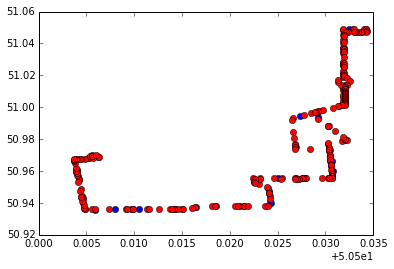

In [3]:
xs, ys, ts = zip(*rounds[0])
plt.plot(xs, ys, 'o', c ='b')
xs, ys, ts = zip(*rounds[7])
plt.plot(xs, ys, 'o', c = 'r')

Этот график проверка, что данные отделяются верно. Ещё не много стоит его доработать.

In [7]:
from split_rounds import mean_stay

mean_stays_rounds = mean_stay(rounds)
print(len(mean_stays_rounds), len (rounds))

15 55


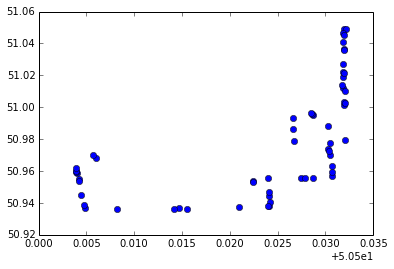

In [8]:
xs, ys, ts = zip(*mean_stays_rounds[0])
plt.plot(xs, ys, 'o', c ='b')

In [9]:
from speed import find_speed

speed = []
for i in mean_stays_rounds:
    xs, ys, ts = zip(*i)
    speed.append(find_speed(xs, ys, ts))

In [10]:
from speed import mean_speed

mean_speeds_rounds = mean_speed(speed, mean_stays_rounds)

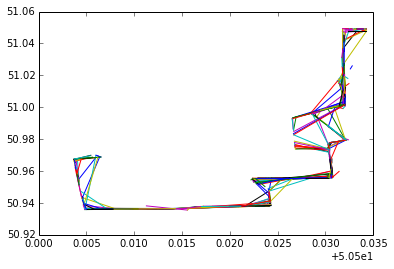

In [11]:
for i in mean_speeds_rounds:
    for j in i:
        xs = [j[0][0], j[1][0]]
        ys = [j[0][1], j[1][1]]
        plt.plot(xs, ys)


66
65


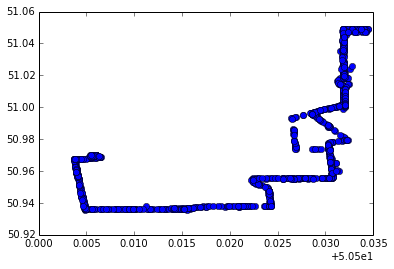

In [12]:
for i in mean_stays_rounds:
    xs, ys, ts = zip(*i)
    plt.plot(xs, ys, 'o', c = 'b')
print(len(xs))
print(len(speed[len(speed) - 1]))

In [ ]:
from split_rounds import filter_rounds_by_len

